# 6주차 | 고급파이썬프로그래밍 | 2022.04.08(금)

## Intro.

### notice
- 구구단 문제와 관련해서 잘 정리된 repository를 추천해줄 예정.
- 0422 중간고사 : 대면 진행, 다음주 월요일에 공개될 문제의 코드를 외워서 30분 내에 종이에 코드 수기 작성

<hr>

## Class

### 1. NLTK Corpus

In [3]:
# nltk에서 brown과 inagural 다운받기
import nltk
nltk.download(['brown', 'inaugural'])

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

#### 1.1. brown 다루기

In [4]:
brown = nltk.corpus.brown

In [11]:
# genre별로 modals의 빈도수를 나타내는 tabulate 만들기 1 - modal이 아래에 있는 경우
cfd1 = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories = genre)
)

genres = brown.categories()[:5]
modals = ['can', 'could', 'will', 'would', 'may', 'might']
cfd1.tabulate(conditions = genres, samples = modals)

                 can could  will would   may might 
     adventure    46   151    50   191     5    58 
belles_lettres   246   213   236   392   207   113 
     editorial   121    56   233   180    74    39 
       fiction    37   166    52   287     8    44 
    government   117    38   244   120   153    13 


In [18]:
# genre별로 modals의 빈도수를 나타내는 tabulate 만들기 2 - modal이 위에 있는 경우
cfd2 = nltk.ConditionalFreqDist(
    (genre, modals) # 첫 번째 요소가 세로축, 두 번째 요소가 가로축을 이룸.
    for genre in brown.categories()
    for modals in ['can', 'could', 'will', 'would', 'may', 'might']
    
    for word in brown.words(categories = genre) # 콜론(:) 없음
        if word.lower() == modals # candidate 
)

cfd2.tabulate()
# 개념 이해해야 함.

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


In [ ]:
# pip install matplotlib
# matplotlib이 설치되어 있지 않은 상태라면 위의 코드로 설치해준다.

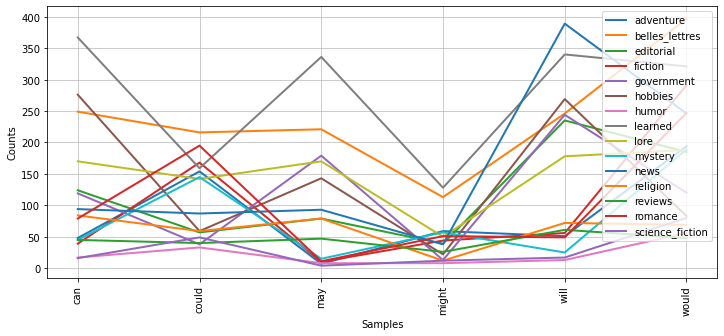

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 5))
cfd2.plot()

#### 1.2. inaugural 다루기

In [22]:
inaugural = nltk.corpus.inaugural

In [24]:
inaugural.fileids()[:10] # 연도-이름.txt

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt']

In [37]:
# inaugural에서 america, citizen이 포함되어 있는 단어의 빈도수의 연도별 tabulate 만들기
# .txt는 제거하고, 처음 10개의 fileid에서만 추출함.

cfd3 = nltk.ConditionalFreqDist(
    (fileid[:-4], target_word)
    for fileid in inaugural.fileids()[:10]
    for target_word in ['america', 'citizen']
    
    for word in inaugural.words(fileids = fileid)
        if word.lower().startswith(target_word)
)

cfd3.tabulate()

                america citizen 
1789-Washington       2       5 
1793-Washington       1       1 
     1797-Adams       8       6 
 1801-Jefferson       0       7 
 1805-Jefferson       1      10 
   1809-Madison       0       1 
   1813-Madison       1       4 
    1817-Monroe       1      14 
    1821-Monroe       2      15 
     1825-Adams       0       3 


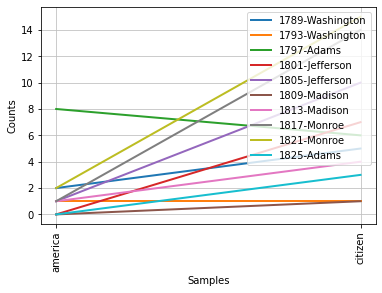

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [38]:
cfd3.plot()

### 2. List & Tuple

#### 2.1. 생성하기

In [45]:
# 비어있는 리스트와 튜플 생성하기.

emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyL, emptyT

([], ())

In [46]:
# 요소가 2개 이상인 리스트와 튜플 생성하기.

list2 = ['a', 'b']

tuple2 = 'a', 'b' # 코드는 덜어내는 게 더 효율적이므로 이 방법을 더 많이 씀.
tuple2 = ('a', 'b')

list2, tuple2

(['a', 'b'], ('a', 'b'))

In [47]:
# 요소가 1개인 리스트와 튜플 생성하기.

list1 = ['a']

tuple1 = 'a', # comma가 필요함.
tuple1 = ('a',)

list1, tuple1

(['a'], ('a',))

In [51]:
# 요소가 1개인 튜플을 생성할 때 comma를 쓰지 않으면?

tuple1_without_comma = ('a')
type(tuple1_without_comma) # type 출력 시 tuple이 아닌 str로 나옴.

str

#### 2.2. 여러 변수 할당하기.
- packing : 한 변수에 여러 개의 데이터를 할당하는 것.
    - list, tuple 자체가 packing이다. 
    - ex) list = [1, 2, 3, 4] / tuple = (1, 2, 3, 4)
- unpacking : 여러 변수에 각각 하나씩의 데이터를 할당는 것.
    - a, b, c = [1, 2, 3]

In [53]:
# unpacking

name = 'lee'
a, b, c = name
a, b, c # name에 들어 있던 'lee' 값이 나눠져서 각각 a, b, c에 할당됨.

('l', 'e', 'e')

In [56]:
# unpacking을 통해 값을 교환하는 방법.
# pwd와 userid의 값을 서로 바꾸고 싶을 땐?

pwd = 'password'
userid = 'userid'

pwd, userid = userid, pwd
print("pwd : ", pwd, "\nuserid :", userid)

pwd :  userid 
userid : password


#### 2.3. Tuple로 연산하기

In [57]:
# 더하기
('a',) + ('b', 'c')

('a', 'b', 'c')

In [58]:
# 곱하기
('a', 'b') * 3

('a', 'b', 'a', 'b', 'a', 'b')

In [63]:
# 할당 후 각각의 튜플 출력하기
a = 1, 2
b = 1, 3
print(a, b)

(1, 2) (1, 3)


#### 2.4. Tuple 순회하기

In [62]:
a = 1, 2, 3, 4, 5

for i in a:
    print(i, "번째 돌고 있습니다. : ", a)

1 번째 돌고 있습니다. :  (1, 2, 3, 4, 5)
2 번째 돌고 있습니다. :  (1, 2, 3, 4, 5)
3 번째 돌고 있습니다. :  (1, 2, 3, 4, 5)
4 번째 돌고 있습니다. :  (1, 2, 3, 4, 5)
5 번째 돌고 있습니다. :  (1, 2, 3, 4, 5)


#### 2.5. list comprehension
- tuple은 따로 tuple comprehension 같은 것은 없다.

In [71]:
a = 1, 2, 3, 4, 5

# 1번째 방법
print(tuple([word for word in a]))

# 2번째 방법 : 상대적으로 느림.
*[word for word in a],

(1, 2, 3, 4, 5)


(1, 2, 3, 4, 5)

#### 2.6. tuple은 불변 객체
- 이 특성을 이용해, 코드 작성 시 수정하면 안 되는 값을 튜플에 넣어 사용함.
- key 값을 저장
- tuple은 메모리 사용이 적음.

In [76]:
a = 1,
b = 1, 2, 3
print(a, a+b)
id(a), id(a + b) # id값이 다름.

(1,) (1, 1, 2, 3)


(2750168243504, 2750168394304)

#### 2.7. 형 반환

In [86]:
print(tuple('cat'), tuple(['cat']))

('c', 'a', 't') ('cat',)


In [89]:
print(list('cat'), list(['cat']))

['c', 'a', 't'] ['cat']


#### 2.8. list와 tuple 장점 정리
- 튜플 장점
    - 타인이 변경하는 것을 막을 수 있다. **
    - 메모리 사용이 적다.
- 리스트 장점
    - 데이터를 순차적으로 파악하기 좋다.
    - 중복되는 데이터를 포함할 수 있다.

### list 관련 함수는 textbook에서 다룬다. 

<hr>

## TextBook

## Chapter 07 | 튜플과 리스트 (p.152 ~ p.173)

리스트의 내용을 주로 다룰 것임. 7.2.29 리스트의 리스트 및 그 이후 내용은 생략.

In [7]:
# 7.2.3 문자열 분할로 생성하기 : split()

today = "2022/04/08"
today.split("/")

['2022', '04', '08']

In [11]:
# 7.2.4 [offset]으로 항목 얻기
# offset 범위를 벗어나면 error가 난다. 

player = ['Jisung Park', 'Yuna Kim', 'Hyunjin Ryu']
print(player[0])
print(player[1])
print(player[2] + "\n")

# 음수 인덱스
print(player[-1])
print(player[-2])
print(player[-3])

Jisung Park
Yuna Kim
Hyunjin Ryu

Hyunjin Ryu
Yuna Kim
Jisung Park


In [22]:
# 7.2.5 슬라이스로 항목 얻기

player = ['Jisung Park', 'Yuna Kim', 'Hyunjin Ryu']
print("원래의 리스트 : ", player)
print(player[0:2])
print(player[1:2])
print(player[::-1], "\n")

# 리스트를 뒤집고 싶다면 : list.reverse()
player.reverse()
print("뒤집힌 리스트 : ", player)

원래의 리스트 :  ['Jisung Park', 'Yuna Kim', 'Hyunjin Ryu']
['Jisung Park', 'Yuna Kim']
['Yuna Kim']
['Hyunjin Ryu', 'Yuna Kim', 'Jisung Park'] 

뒤집힌 리스트 :  ['Hyunjin Ryu', 'Yuna Kim', 'Jisung Park']


In [37]:
# 7.2.6 리스트 끝에 항목 추가하기 : append()

week = ['tue', 'wed']
print(week)

week.append('thu')
print(week)

['tue', 'wed']
['tue', 'wed', 'thu']


In [38]:
# 7.2.7 오프셋과 insert()로 항목 추가하기
# 오프셋 0은 시작점에 항목을 삽입, 리스트의 끝을 넘는 오프셋은 끝에 항목이 삽입된다.
print(week)
week.insert(0, 'mon')
print(week)
week.insert(10, 'fri')
print(week)

['tue', 'wed', 'thu']
['mon', 'tue', 'wed', 'thu']
['mon', 'tue', 'wed', 'thu', 'fri']


In [33]:
# 7.2.8 모든 항목 복제하기:*

print(['blah'] * 2)
print(['blah'] * 5)

['blah', 'blah']
['blah', 'blah', 'blah', 'blah', 'blah']


In [39]:
# 7.2.9 리스트 병합하기: extend()와 +

print(week)
others = ['sat', 'sun']
week.extend(others)
print(week, "\n")

others2 = ['mon', 'tue']
week += others2
print(week)

# 참고 : append()를 사용하면 항목을 병합하지 않고 others가 하나의 리스트로 추가된다. 

['mon', 'tue', 'wed', 'thu', 'fri']
['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'] 

['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', 'mon', 'tue']


In [40]:
# 7.2.10 [offset]으로 항목 바꾸기
print(week)
week[-2] = ""
print(week)

['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', 'mon', 'tue']
['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', '', 'tue']


In [41]:
# 7.2.11 슬라이스로 항목 바꾸기
print(week)
week[8:9] = ""
print(week)

['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', '', 'tue']
['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', '']


In [42]:
# 7.2.12 오프셋으로 항목 삭제하기 : del
print(week)
del week[-1]
print(week)

['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', '']
['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']


In [43]:
# 7.2.13 값으로 항목 삭제하기 : remove()
print(week)
week.remove('mon')
print(week)

['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
['tue', 'wed', 'thu', 'fri', 'sat', 'sun']


In [44]:
# 7.2.14 오프셋으로 항목을 얻은 후 삭제하기 : pop()
print(week)
week.pop() # 맨 마지막 값을 삭제한다.
print(week)

week.pop(1)
print(week) # 오프셋 1의 값을 삭제한다.

['tue', 'wed', 'thu', 'fri', 'sat', 'sun']
['tue', 'wed', 'thu', 'fri', 'sat']
['tue', 'thu', 'fri', 'sat']


In [45]:
# 7.2.15 모든 항목 삭제하기 : clear()
print(week)
week.clear()
print(week)

['tue', 'thu', 'fri', 'sat']
[]


In [48]:
# 7.2.16 값으로 오프셋 찾기 : index()
Gingamingayo = list("Welcome to the strange world")
print(Gingamingayo)
Gingamingayo.index('e') # 리스트에 같은 값이 2개 이상이면 첫 번째 오프셋만 반환한다. 

['W', 'e', 'l', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 's', 't', 'r', 'a', 'n', 'g', 'e', ' ', 'w', 'o', 'r', 'l', 'd']


1

In [51]:
# 7.2.17 존재여부 확인하기: in
blackpink = ['제니', '리사', '지수', '로제']
print('제니' in blackpink) # 리스트에는 같은 값이 여러 개 존재할 수 있는데, 값이 하나 이상 존재하면 in은 True를 반환한다. 
print('사나' in blackpink)

True
False


In [60]:
# 7.2.18 값 세기 : count()
print(feel_good := "어질어질해 feel good 아찔아찔해 feel good\n\
지금 내 기분은 rainbow in the sky 사뿐히 밟고 올라가\n\
(And let me tell ya) by my side (Givin' me that) 다가와\n\
조금 다른 나를 만나게 해줄게\n\
'Cause I feel so good\n\
(Nanananana nanananana)\n\
Feel good\n\
(Nanananana nanananana)\n\
(And let me tell ya) by my side (Givin' me that) 다가와\n\
조금 다른 나를 만나게 해줄게\n\
'Cause I feel so good\n")

print("위 가사에 등장한 \n'na'의 갯수 : ", feel_good.lower().count('na'))
print("'rainbow'의 갯수 : ",feel_good.lower().count('rainbow'))
print("'fromis_9'의 갯수 : ",feel_good.lower().count('fromis_9'))

어질어질해 feel good 아찔아찔해 feel good
지금 내 기분은 rainbow in the sky 사뿐히 밟고 올라가
(And let me tell ya) by my side (Givin' me that) 다가와
조금 다른 나를 만나게 해줄게
'Cause I feel so good
(Nanananana nanananana)
Feel good
(Nanananana nanananana)
(And let me tell ya) by my side (Givin' me that) 다가와
조금 다른 나를 만나게 해줄게
'Cause I feel so good

위 가사에 등장한 
'na'의 갯수 :  20
'rainbow'의 갯수 :  1
'fromis_9'의 갯수 :  0


In [141]:
# 7.2.19 문자열로 변환하기 : join() 
# join()리스트 메서드가 아니다. split()의 반대라고 생각하면 기억하기 쉬울 것.
friends = ['Harry', 'Hermione', 'Ron']
seperate = " & "
print(friends_join := seperate.join(friends))

Harry & Hermione & Ron


In [92]:
# 7.2.20 정렬하기 : sort()와 sorted()
# sort()는 리스트 자체를 내부적으로 정렬한다.
# sorted()는 리스트의 정렬된 복사본을 반환한다. 
# 리스트의 항목이 숫자라면 오름차순(기본값)으로 정렬한다. 문자열이면 알파벳순으로 정렬한다. 

print(num_lst := [5, 3, 8, 6, 1, 4, 3, 2, 9])
num_lst.sort()
print(num_lst) # 같은 값(3)이 여러 개라면, 같은 값들을 모두 배열한 뒤 다음 값을 배열한다.

print("\n")

print(alpha_lst := ['b', 's', 'y', 'a', 'z', 'u'])
print(alpha_lst_sorted := sorted(alpha_lst))

print("\n")

print(num_lst2 := [1, 4, 3, 2])
num_lst.sort(reverse = True) # reverse = True를 인수에 넣어주면 내림차순으로 정렬된다.
print(num_lst)

[5, 3, 8, 6, 1, 4, 3, 2, 9]
[1, 2, 3, 3, 4, 5, 6, 8, 9]


['b', 's', 'y', 'a', 'z', 'u']
['a', 'b', 's', 'u', 'y', 'z']


[1, 4, 3, 2]
[9, 8, 6, 5, 4, 3, 3, 2, 1]


In [93]:
# 7.2.21 항목 개수 얻기 : len()
hello = ['h', 'e', 'l', 'l', 'o']
len(hello)

5

In [95]:
# 7.2.22 할당하기: =

a = [1, 2, 3]
b = a
a[0] = 'black'
print(b) # b도 마찬가지로 바뀐 것을 알 수 있다.

['black', 2, 3]


In [107]:
# 7.2.23 복사하기: copy(), list(), 슬라이스
a = ['복', '사', '본']
b = a.copy()
c = list(a)
d = a[:]

print("a : ", a, "\n", "b : ", b, "\n", "c : ", c, "\n", "d : ", d, "\n")

del c[0:3]
c.insert(0, '값 바꾸기')
print("a : ", a, "\n", "c : ", c) # b, c, d는 자신만의 값을 가진 새로운 객체이므로, 값을 바꾸더라도 원본인 a에 영향이 가지 않는다.

a :  ['복', '사', '본'] 
 b :  ['복', '사', '본'] 
 c :  ['복', '사', '본'] 
 d :  ['복', '사', '본'] 

a :  ['복', '사', '본'] 
 c :  ['값 바꾸기']


In [117]:
# 7.2.24 깊은 복사 : deepcopy() 
# 먼저 얕은 복사(shallow copy)의 예시이다. 얕은 복사에서는 원본의 값이 바뀌면 나머지 값들도 바뀐다. 
aa = [1, 2, [8, 9]]
bb = aa.copy()
cc = list(aa)
dd = aa[:]

print(aa, bb, cc, dd)

aa[2][1] = 10
print(aa, bb, cc, dd)

[1, 2, [8, 9]] [1, 2, [8, 9]] [1, 2, [8, 9]] [1, 2, [8, 9]]
[1, 2, [8, 10]] [1, 2, [8, 10]] [1, 2, [8, 10]] [1, 2, [8, 10]]


In [118]:
import copy
aa = [1, 2, [8, 9]]
bb = copy.deepcopy(aa)
print(aa, bb)

aa[2][1] = 10
print(aa, bb) # deepcopy를 사용하면 a의 값이 바뀌어도 b의 값은 변하지 않는다. 

[1, 2, [8, 9]] [1, 2, [8, 9]]
[1, 2, [8, 10]] [1, 2, [8, 9]]


In [112]:
# 7.2.25 리스트 비교
# 비교연산자는 두리스트의 같은 위치의 오프셋 항목을 비교한다. 

a = [1, 2, 3]
b = [1, 2]

print(a == b)
print(a >= b)
print(a <= b)

False
True
False


In [119]:
# 7.2.26 순회하기: for와 in

flowers = ['장미', '유채꽃', '나팔꽃', '무궁화']
for flower in flowers:
    print(flower)

장미
유채꽃
나팔꽃
무궁화


In [120]:
# break문 이용하기.
for flower in flowers:
    if flower.startswith('유'):
        print("아직 안 핀 꽃입니다.")
        break
    else:
        print(flower)

장미
아직 안 핀 꽃입니다.


In [121]:
# break문이 걸리지 않았다면 다음과 같이 else문을 사용할 수 있다. 

for flower in flowers:
    if flower.startswith('뀨'):
        print("아직 안 핀 꽃입니다.")
        break
    else:
        print(flower)
else:
    print("모든 꽃이 피었습니다.")

장미
유채꽃
나팔꽃
무궁화
모든 꽃이 피었습니다.


In [123]:
# in문의 리스트에 항목이 없어서 for문이 실행되지 않을 때도 else문이 실행된다.

flowers = []

for flower in flowers:
        print(flower,"이 피었습니다.")
        break
else:
    print("피어있는 꽃이 아무것도 없습니다.")
    
# flower 리스트가 비어 있어 for문과 break문이 수행되지 않음.

피어있는 꽃이 아무것도 없습니다.


In [125]:
# 7.2.27 여러 시퀀스 순회하기 : zip()
# 여러 시퀀스 중 가장 짧은 시퀀스가 완료되면 zip()은 멈춘다.

friends = ['철수', '영희', '나현', '지우']
subjects = ['영어', '수학', '국어', '사회']
scores = [100, 80, 90, 70, 50]

for friend, subject, score in zip(friends, subjects, scores):
    print(friend, "의 응시 과목은 ", subject, "이며, 총 ", score, "점을 얻었습니다.") 
    
# scores의 마지막 원소인 50은 반환되지 않는다. 

철수 의 응시 과목은  영어 이며, 총  100 점을 얻었습니다.
영희 의 응시 과목은  수학 이며, 총  80 점을 얻었습니다.
나현 의 응시 과목은  국어 이며, 총  90 점을 얻었습니다.
지우 의 응시 과목은  사회 이며, 총  70 점을 얻었습니다.


In [130]:
english = 'name', 'house', 'mom', 'happy'
turkish = 'adı', 'ev', 'anne', 'mutlu'

print(list(zip(english, turkish)))
print(dict(zip(english, turkish))) # 8장에서 다룰 dict()에 적용하면 작은 사전을 만들 수 있다.

[('name', 'adı'), ('house', 'ev'), ('mom', 'anne'), ('happy', 'mutlu')]
{'name': 'adı', 'house': 'ev', 'mom': 'anne', 'happy': 'mutlu'}


In [131]:
# 7.2.28 리스트 컴프리헨션
# 파이써닉한 방법(리스트 컴프리헨션)으로 정수 리스트 만들기
num_lst = [n for n in range(1, 6)]
num_lst

[1, 2, 3, 4, 5]

In [133]:
# 1과 10 사이에서 짝수 리스트 만들기
even_lst = [n for n in range(1, 11) if n%2 == 0]
even_lst

[2, 4, 6, 8, 10]

In [140]:
rows = range(1, 4)
cols = range(1, 3)
cells = [(row, col) for row in rows for col in cols]
for cell in cells:
    print(cell)
    
print("\n")

for row, col in cells:
    print(row, col) # tuple unpacking 과정

(1, 1)
(1, 2)
(2, 1)
(2, 2)
(3, 1)
(3, 2)


1 1
1 2
2 1
2 2
3 1
3 2


<hr>

## Outro.

### Quiz 1. 다음 문장을 [(대문자, 타이틀, 글자수), ...]로 저장된 리스트로 만들어라.

In [145]:
sentence = "don't judge a book by its cover."

[(w.upper(), w.title(), len(w)) for w in sentence.split()]

[("DON'T", "Don'T", 5),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER.', 'Cover.', 6)]

### Quiz 2. 리스트 컴프리헨션을 사용하여 주어진 text와 함께 다음을 수행하라.
- 2.1. 문장으로 구성된 리스트로 만들기
- 2.2. 전체 단어를 하나의 리스트로 가져오기.
- 2.3. 전체를 스트링으로 가져오기.

In [146]:
text = [
    ['hello', 'guys'],
    ['how', 'are', 'you']
]

In [151]:
# 2.1
[" ".join(w) for w in text]

['hello guys', 'how are you']

In [152]:
# 2.2
[w for sent in text for w in sent]

['hello', 'guys', 'how', 'are', 'you']

In [154]:
# 2.3
" ".join([w for sent in text for w in sent])

'hello guys how are you'

- 다음주 목요일 자정까지 <과제 : 브라운 코퍼스 정제하기>를 수행하기 바람.